# 逻辑斯蒂回归

## 1、Logistics回归的原理

利用Logistics回归进行分类的主要思想是：根据现有数据对分类边界线建立回归公式，以此进行分类。这里的“回归” 一词源于最佳拟合，表示要找到最佳拟合参数集。

训练分类器时的做法就是寻找最佳拟合参数，使用的是最优化算法。接下来介绍这个二值型输出分类器的数学原理

Logistic Regression和Linear Regression的原理是相似的，可以简单的描述为这样的过程：

（1）找一个合适的预测函数，一般表示为h函数，该函数就是我们需要找的分类函数，它用来预测输入数据的判断结果。这个过程时非常关键的，需要对数据有一定的了解或分析，知道或者猜测预测函数的“大概”形式，比如是线性函数还是非线性函数。

（2）构造一个Cost函数（损失函数），该函数表示预测的输出（h）与训练数据类别（y）之间的偏差，可以是二者之间的差（h-y）或者是其他的形式。综合考虑所有训练数据的“损失”，将Cost求和或者求平均，记为J(θ)函数，表示所有训练数据预测值与实际类别的偏差。

（3）显然，J(θ)函数的值越小表示预测函数越准确（即h函数越准确），所以这一步需要做的是找到J(θ)函数的最小值。找函数的最小值有不同的方法，Logistic Regression实现时有的是梯度下降法（Gradient Descent）。


### 1)  构造预测函数

Logistic Regression虽然名字里带“回归”，但是它实际上是一种分类方法，用于两分类问题（即输出只有两种）。根据第二章中的步骤，需要先找到一个预测函数（h），显然，该函数的输出必须是两个值（分别代表两个类别），所以利用了Logistic函数（或称为Sigmoid函数），函数形式为：

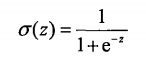

该函数形状为：

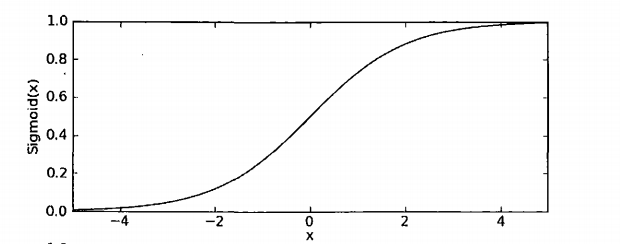

预测函数可以写为：

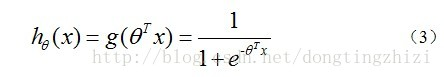

### 2）构造损失函数

Cost函数和J(θ)函数是基于最大似然估计推导得到的。

每个样本属于其真实标记的概率，即似然函数，可以写成：

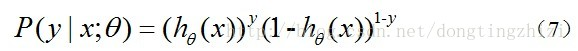

所有样本都属于其真实标记的概率为

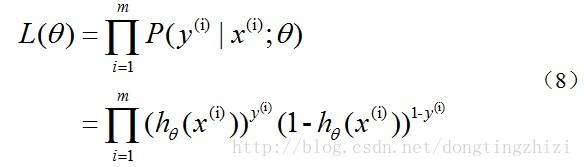

对数似然函数为

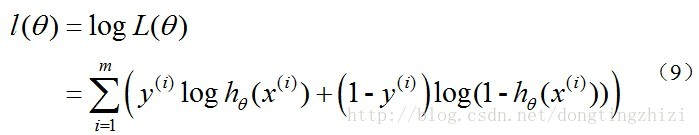

最大似然估计就是要求得使l(θ)取最大值时的θ，其实这里可以使用梯度上升法求解，求得的θ就是要求的最佳参数

### 3) 梯度下降法求J(θ)的最小值

梯度下降算法的递推公式： 
xn+1=xn−μ∗f′(xn)

## 2、实战

`
sklearn.linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
`

solver参数的选择：
- “liblinear”：小数量级的数据集
- “lbfgs”, “sag” or “newton-cg”：大数量级的数据集以及多分类问题
- “sag”：极大的数据集

### 1) 手写数字数据集的分类

使用KNN与Logistic回归两种方法

In [3]:
from sklearn import datasets, neighbors, linear_model

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:round(.9 * n_samples)]
y_train = y_digits[:round(.9 * n_samples)]
X_test = X_digits[round(.9 * n_samples):]
y_test = y_digits[round(.9 * n_samples):]

knn = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression()

print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f'
      % logistic.fit(X_train, y_train).score(X_test, y_test))

KNN score: 0.961111
LogisticRegression score: 0.938889


### 2) 使用make_blobs产生数据集进行分类

training score : 0.995 (multinomial)
training score : 0.976 (ovr)


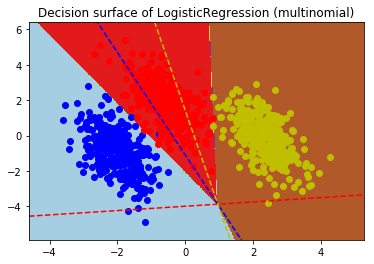

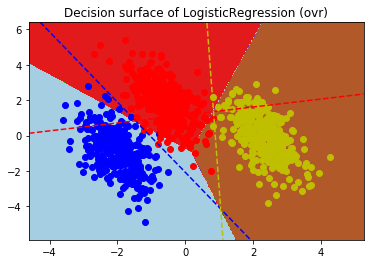

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "bry"
    for i, color in zip(clf.classes_, colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

plt.show()

## 3、作业

#### 【第1题】预测年收入是否大于50K美元

读取adult.txt文件，并使用KNN算法训练模型，根据种族、职业、工作时长来预测一个人的性别

In [19]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Import the adult.txt file into Python
data = pd.read_csv('../data/adults.txt', sep=',')

# DO NOT WORRY ABOUT THE FOLLOWING 2 LINES OF CODE
# Convert the string labels to numeric labels
for label in ['race', 'occupation']:
    data[label] = LabelEncoder().fit_transform(data[label])

# Take the fields of interest and plug them into variable X
X = data[['race', 'hours_per_week', 'occupation']]
# Make sure to provide the corresponding truth value
Y = data['sex'].values.tolist()

# Split the data into test and training (30% for test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Instantiate the classifier
clf = LogisticRegression()

# Train the classifier using the train data
clf = clf.fit(X_train, Y_train)

# Validate the classifier
accuracy = clf.score(X_test, Y_test)
print('Accuracy: ' + str(accuracy))

# Make a confusion matrix
prediction = clf.predict(X_test)

cm = confusion_matrix(prediction, Y_test)
print(cm)

Accuracy: 0.675401781144
[[ 486  436]
 [2735 6112]]


#### 【第2题】从疝气病症预测病马的死亡率

In [23]:
data = pd.read_table('../data/horseColicTraining.txt',header=None)
data.tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
294,1.0,1.0,0.0,120.0,70.0,4.0,0.0,4.0,2.0,2.0,...,0.0,0.0,0.0,0.0,5.0,55.0,65.0,0.0,0.0,0.0
295,2.0,1.0,37.2,72.0,24.0,3.0,2.0,4.0,2.0,4.0,...,3.0,1.0,0.0,4.0,4.0,44.0,0.0,3.0,3.3,0.0
296,1.0,1.0,37.5,72.0,30.0,4.0,3.0,4.0,1.0,4.0,...,2.0,1.0,0.0,3.0,5.0,60.0,6.8,0.0,0.0,0.0
297,1.0,1.0,36.5,100.0,24.0,3.0,3.0,3.0,1.0,3.0,...,3.0,1.0,0.0,4.0,4.0,50.0,6.0,3.0,3.4,1.0
298,1.0,1.0,37.2,40.0,20.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,36.0,62.0,1.0,1.0,0.0


In [ ]:
'''
Created on Oct 27, 2010
Logistic Regression Working Module
@author: Peter
'''
from numpy import *

def loadDataSet():
    dataMat = []; labelMat = []
    fr = open('testSet.txt')
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)             #convert to NumPy matrix
    labelMat = mat(classLabels).transpose() #convert to NumPy matrix
    m,n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n,1))
    for k in range(maxCycles):              #heavy on matrix operations
        h = sigmoid(dataMatrix*weights)     #matrix mult
        error = (labelMat - h)              #vector subtraction
        weights = weights + alpha * dataMatrix.transpose()* error #matrix mult
    return weights

def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0] 
    xcord1 = []; ycord1 = []
    xcord2 = []; ycord2 = []
    for i in range(n):
        if int(labelMat[i])== 1:
            xcord1.append(dataArr[i,1]); ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1]); ycord2.append(dataArr[i,2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)   #initialize to all ones
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i]*weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

def stocGradAscent1(dataMatrix, classLabels, numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)   #initialize to all ones
    for j in range(numIter):
        dataIndex = range(m)
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.0001    #apha decreases with iteration, does not 
            randIndex = int(random.uniform(0,len(dataIndex)))#go to 0 because of the constant
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5: return 1.0
    else: return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt'); frTest = open('horseColicTest.txt')
    trainingSet = []; trainingLabels = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 1000)
    errorCount = 0; numTestVec = 0.0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVector(array(lineArr), trainWeights))!= int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print "the error rate of this test is: %f" % errorRate
    return errorRate

def multiTest():
    numTests = 10; errorSum=0.0
    for k in range(numTests):
        errorSum += colicTest()
    print "after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests))
        